### **SQL**

Компания купила крупный сервис для чтения книг по подписке.  
Данные - база данных с информацией о книгах, издательствах, авторах, а также пользовательские обзоры книг.  
###### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.
**Основная задача — проанализировать базу данных.**  

**Цель - провести анализ данных выгрузив поочередно информацию, которая поможет сформулировать ценностное предложение для нового продукта.**  

**Задачи:** 
- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

### Смотрим на данные

In [2]:
# откроем таблицу books и исследуем , проверим на дубликаты, пропуски и типы
books = pd.io.sql.read_sql('''SELECT *
                              FROM books 
                              ''', con = engine)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
print(f"Количество дубликатов: {books.duplicated().sum()}")
display(books.head())
display(books.info())

Количество дубликатов: 0


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

###### Краткий вывод:  
Датафрейм books состоит из 6 столбцов, не имеет пропусков и дубликатов.  
Типы данных соответсвуют, кроме столбца "publication_date" - должен быть тип datetime.

In [3]:
# откроем таблицу authors и исследуем , проверим на дубликаты, пропуски и типы
authors = pd.io.sql.read_sql('''SELECT *
                                FROM authors 
                                ''', con = engine)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
print(f"Количество дубликатов: {authors.duplicated().sum()}")
display(authors.head())
display(authors.info())

Количество дубликатов: 0


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

###### Краткий вывод:  
Датафрейм authors состоит из 2 столбцов, не имеет пропусков и дубликатов.
Типы данных соответсвуют.

In [4]:
# откроем таблицу publishers и исследуем , проверим на дубликаты, пропуски и типы
publishers = pd.io.sql.read_sql('''SELECT *
                                   FROM publishers 
                                   ''', con = engine)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
print(f"Количество дубликатов: {publishers.duplicated().sum()}")
display(publishers.head())
display(publishers.info())

Количество дубликатов: 0


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

###### Краткий вывод:  
Датафрейм publishers состоит из 2 столбцов, не имеет пропусков и дубликатов.
Типы данных соответсвуют.

In [5]:
# откроем таблицу ratings и исследуем , проверим на дубликаты, пропуски и типы
ratings = pd.io.sql.read_sql('''SELECT *
                                FROM ratings  
                                ''', con = engine)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
print(f"Количество дубликатов: {ratings.duplicated().sum()}")
display(ratings.head())
display(ratings.info())

Количество дубликатов: 0


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

###### Краткий вывод:  
Датафрейм ratings состоит из 4 столбцов, не имеет пропусков и дубликатов.
Типы данных соответсвуют.

In [6]:
# откроем таблицу reviews и исследуем , проверим на дубликаты, пропуски и типы
reviews = pd.io.sql.read_sql('''SELECT *
                                FROM reviews 
                                ''', con = engine)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
print(f"Количество дубликатов: {reviews.duplicated().sum()}")
display(reviews.head())
display(reviews.info())

Количество дубликатов: 0


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

###### Краткий вывод:  
Датафрейм reviews состоит из 4 столбцов, не имеет пропусков и дубликатов.
Типы данных соответсвуют.

### Переходим к выполнению задач

In [7]:
# Посчитайте, сколько книг вышло после 1 января 2000 года
pd.io.sql.read_sql('''SELECT COUNT(book_id) 
                      FROM books 
                      WHERE publication_date > '2000-01-01'
                      ''', con = engine)

,count
0,819


После 1 января 2000 года вышло 819 книг.

In [8]:
# Для каждой книги посчитайте количество обзоров и среднюю оценку
pd.io.sql.read_sql('''SELECT b.book_id,
                             b.title,
                             COUNT(DISTINCT review_id) as cnt_rev,
                             AVG(rating) as rating_avg
                      FROM
                          books as b
                      LEFT JOIN reviews as r ON r.book_id = b.book_id
                      INNER JOIN ratings as rt ON rt.book_id = b.book_id
                      GROUP BY b.book_id
                      ORDER BY cnt_rev DESC
                      ''', con = engine)

,book_id,title,cnt_rev,rating_avg
0,948,Twilight (Twilight #1),7,3.662500
1,963,Water for Elephants,6,3.977273
2,734,The Glass Castle,6,4.206897
3,302,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),6,4.414634
4,695,The Curious Incident of the Dog in the Night-Time,6,4.081081
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
996,808,The Natural Way to Draw,0,3.000000
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000
998,221,Essential Tales and Poems,0,4.000000


Больше всего обзоров у книги Twilight (Twilight#1) - 7, при среднем рейтинге - 3,66. На последнем месте Disney's Beauty and the Beast (A Little Golden Book) без обзоров, но с средним рейтингом - 4.

In [9]:
# Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры
pd.io.sql.read_sql('''WITH pages AS (SELECT p.publisher_id,
                                            p.publisher,
                                            b.book_id,
                                            b.author_id,
                                            b.num_pages
                                    FROM publishers p
                                    LEFT JOIN books b 
                                    ON p.publisher_id = b.publisher_id
                                    WHERE num_pages > 50
                                    ORDER BY p.publisher_id
                                    )
                      SELECT publisher,
                      COUNT(*) OVER (PARTITION BY publisher_id) AS count
                      FROM pages
                      ORDER BY count DESC
                      LIMIT 1
                      ''', con = engine)

,publisher,count
0,Penguin Books,42


Издательство под названием Penguin Books выпустило наибольшее число книг толще 50 страниц - 42 книги.

In [10]:
# Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками
pd.io.sql.read_sql(''' SELECT author,
                              AVG(cr.rating_avg) as total_rating_avg
                       FROM
                           (SELECT author,
                                   b.book_id,
                                   AVG(rating) as rating_avg
                            FROM authors as a
                            LEFT JOIN books as b ON b.author_id = a.author_id
                            LEFT JOIN ratings as rt ON rt.book_id = b.book_id
                            GROUP BY a.author,
                                     b.book_id
                            HAVING COUNT(rating) > 50) as cr
                       GROUP BY author
                       ORDER BY total_rating_avg DESC
                       LIMIT 1
                      ''', con = engine)

,author,total_rating_avg
0,J.K. Rowling/Mary GrandPré,4.283844


Авторами с самой высокой средней оценкой книг (4,28) являются J.K. Rowling/Mary GrandPré.

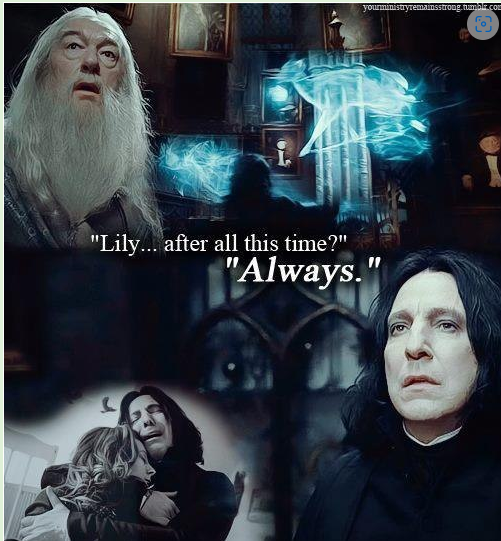

In [11]:
# Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок
pd.io.sql.read_sql('''SELECT ROUND(AVG(cr_cnt_txt.cnt_txt)) AS cnt_txt_avg
                      FROM
                          (SELECT COUNT(text) as cnt_txt
                           FROM reviews
                           WHERE username IN
                                            (SELECT username
                                             FROM ratings
                                             GROUP BY username
                                             HAVING COUNT(ratings) > 50)
                           GROUP BY username) AS cr_cnt_txt 
                    ''', con = engine)

,cnt_txt_avg
0,24.0


Среднее количество обзоров от пользователей, которые поставили более 50 оценок составляет 24 обзора.

### Вывод
Открыли данные и провели исследование на дубликаты, пропуски и соответствия типов.  
После пошагово выполнили 5 запросов и получили следующую информацию:  
- После 1 января 2000 года вышло 819 книг.  
- Больше всего обзоров у книги Twilight (Twilight#1) - 7, при среднем рейтинге - 3,66. На последнем месте Disney's Beauty and the Beast (A Little Golden Book) без обзоров, но с средним рейтингом - 4.  
- Издательство под названием Penguin Books выпустило наибольшее число книг толще 50 страниц - 42 книги.  
- Авторами с самой высокой средней оценкой книг (4,28) являются J.K. Rowling/Mary GrandPré.  
- Среднее количество обзоров от пользователей, которые поставили более 50 оценок составляет 24 обзора.  

Таким образом можно сформуливороть ценностное предложение в следующем виде - книга должна быть похожей на книгу Twilight (Twilight#1) или иметь средний рейтинг выше 3,7; Желательно чтобы они издавалась в Penguin Books. Также можно предложить книги авторов J.K. Rowling/Mary GrandPré. 